# 10. Time Series 

### Date and Time Data Types and Tools

In [1]:
from datetime import datetime

In [2]:
now = datetime.now()

In [3]:
now

datetime.datetime(2017, 3, 14, 12, 57, 53, 338340)

In [4]:
now.year, now.month, now.day

(2017, 3, 14)

In [5]:
delta = datetime(2011,11,7) - datetime(2008,6,24,8,15)

In [6]:
delta

datetime.timedelta(1230, 56700)

In [7]:
delta.days

1230

In [8]:
delta.seconds

56700

In [9]:
from datetime import timedelta

In [10]:
start = datetime(2011,1,7)
start

datetime.datetime(2011, 1, 7, 0, 0)

In [11]:
start + timedelta(12) # 12일 추가 

datetime.datetime(2011, 1, 19, 0, 0)

In [12]:
start - 2 * timedelta(12) # 24일 빼기. 

datetime.datetime(2010, 12, 14, 0, 0)

#### Types in datetime module 
 - date : Store calendar date (year, month, day) using the Gregorian calendar.
 - time : Store time of day as hours, minutes, seconds, and microseconds
 - datetime : Stores both date and time
 - timedelta : Represents the difference between two datetime values (as days, seconds, and microseconds)

### Converting between string and datetime

In [13]:
stamp = datetime(2011,1,3)
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [14]:
str(stamp)

'2011-01-03 00:00:00'

In [15]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

 Converting strings to dastes using **datetime.strptime**
  - datetime.strptime is the best way to parse a date with a known format.

In [16]:
value = '2011-01-03'

In [17]:
datetime.strptime(value,"%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
datestrs = ['7/6/2011','8/6/2011']
datestrs

['7/6/2011', '8/6/2011']

In [19]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

- especially for common date formats. In this case, you can use the parser.parse method in the third party dateutil package

In [20]:
from dateutil.parser import parse

In [21]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

 - dateutil is capable of parsing almost any human-intelligible date representation

In [22]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

 - In international locales, day appearing before month is very common, so you can pass dayfirst=True to indicate this

In [23]:
parse('6/11/2013', dayfirst=True)

datetime.datetime(2013, 11, 6, 0, 0)

 - **Pandas** is generally oriented toward working with arrays of dates. whether used as an axis index or a column in a DataFrame.

In [24]:
import pandas as pd

In [25]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [26]:
idx = pd.to_datetime(datestrs + [None])

In [27]:
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [28]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

|Type | Description |   
|---|---|
|%Y |4-digit year|
|%y |2-digit year|
|%m |2-digit month [01, 12]|
|%d |2-digit day [01, 31]|
|%H |Hour (24-hour clock) [00, 23]|
|%I |Hour (12-hour clock) [01, 12]|
|%M |2-digit minute [00, 59]|
|%S |Second [00, 61] (seconds 60, 61 account for leap seconds)|
|%w |Weekday as integer [0 (Sunday), 6]|
|%U |Week number of the year [00, 53]. Sunday is considered the first day of the week, and days before the first Sunday of the year are “week 0”.|
|%W |Week number of the year [00, 53]. Monday is considered the first day of the week, and days before the first Monday of the year are “week 0”.|
|%z |UTC time zone offset as +HHMM or -HHMM, empty if time zone naive|
|%F |Shortcut for %Y-%m-%d, for example 2012-4-18|
|%D |Shortcut for %m/%d/%y, for example 04/18/12|

## Time Series Basics
 - The most basic kind of time series object in pandas is a Series indexed by timestamps, which is often represented external to pandas as Python strings or datetime objects

In [29]:
from datetime import datetime
from pandas import Series
import numpy as np

In [30]:
%matplotlib inline

In [31]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
 datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [32]:
dates

[datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0),
 datetime.datetime(2011, 1, 7, 0, 0),
 datetime.datetime(2011, 1, 8, 0, 0),
 datetime.datetime(2011, 1, 10, 0, 0),
 datetime.datetime(2011, 1, 12, 0, 0)]

In [33]:
ts = Series(np.random.randn(6), index= dates)

In [34]:
ts

2011-01-02    0.222227
2011-01-05   -0.182966
2011-01-07   -0.712539
2011-01-08   -1.726802
2011-01-10    1.013788
2011-01-12    0.151303
dtype: float64

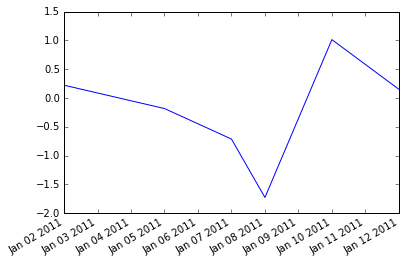

In [35]:
ts.plot()

In [36]:
type(ts)

pandas.core.series.Series

In [37]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [38]:
ts[::2] # 2개씩 뛰어넘어서 0, 2, 4 이렇게 

2011-01-02    0.222227
2011-01-07   -0.712539
2011-01-10    1.013788
dtype: float64

In [39]:
ts + ts[::2]

2011-01-02    0.444454
2011-01-05         NaN
2011-01-07   -1.425078
2011-01-08         NaN
2011-01-10    2.027576
2011-01-12         NaN
dtype: float64

In [40]:
ts.index.dtype

dtype('<M8[ns]')

In [41]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [42]:
stamp = ts.index[2]
stamp

Timestamp('2011-01-07 00:00:00')

In [43]:
ts[stamp]

-0.71253898789002601

In [44]:
ts['1/10/2011']

1.0137880632713283

In [45]:
ts['2011/1/10']

1.0137880632713283

In [46]:
longer_ts = Series(np.random.randn(1000),index=pd.date_range('1/1/2000', periods=1000))
longer_ts[:10]

2000-01-01   -0.432083
2000-01-02    0.263388
2000-01-03   -1.199898
2000-01-04   -0.985666
2000-01-05   -0.584572
2000-01-06   -0.703326
2000-01-07   -1.129676
2000-01-08    1.832493
2000-01-09   -0.272597
2000-01-10    0.929642
Freq: D, dtype: float64

In [47]:
longer_ts.dtype

dtype('float64')

 - Slicing with dates works just like with a regular Series

In [48]:
longer_ts['2001'][:10] 

2001-01-01    0.230943
2001-01-02    0.197424
2001-01-03    1.430673
2001-01-04   -1.165843
2001-01-05    0.743408
2001-01-06   -0.050187
2001-01-07    0.057706
2001-01-08   -0.796125
2001-01-09   -1.856627
2001-01-10   -0.148377
Freq: D, dtype: float64

In [49]:
longer_ts['2001-05'][:10]

2001-05-01    0.099763
2001-05-02   -1.998473
2001-05-03    2.507404
2001-05-04   -2.265269
2001-05-05    0.866558
2001-05-06   -0.492488
2001-05-07    0.021347
2001-05-08   -0.419086
2001-05-09   -0.543534
2001-05-10   -0.256894
Freq: D, dtype: float64

In [50]:
ts[datetime(2011,1,7):] # 2011-01-07 이후로 데이터 가지고 오기.

2011-01-07   -0.712539
2011-01-08   -1.726802
2011-01-10    1.013788
2011-01-12    0.151303
dtype: float64

In [51]:
ts

2011-01-02    0.222227
2011-01-05   -0.182966
2011-01-07   -0.712539
2011-01-08   -1.726802
2011-01-10    1.013788
2011-01-12    0.151303
dtype: float64

In [52]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.712539
2011-01-08   -1.726802
2011-01-10    1.013788
dtype: float64

 - There is an equivalent instance method truncate which slices a TimeSeries between two dates
 - p. 296

In [53]:
ts.truncate(after='1/9/2011')

2011-01-02    0.222227
2011-01-05   -0.182966
2011-01-07   -0.712539
2011-01-08   -1.726802
dtype: float64

In [54]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED') # 수요일마다 일주일씩 반복. 100개.
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [55]:
from pandas import DataFrame

In [56]:
long_df = DataFrame(np.random.randn(100, 4),
     index=dates,
     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.head()

,Colorado,Texas,New York,Ohio
2000-01-05,0.491747,0.832197,1.616526,-0.630280
2000-01-12,0.433331,-1.531454,-0.767647,0.569280
2000-01-19,1.601754,0.681678,0.200292,1.382999
2000-01-26,-0.821280,1.422625,0.407159,0.077996
2000-02-02,-0.241751,-0.228826,-0.166048,-0.225608


In [57]:
long_df.ix['5-2001'] # 2001년 5월 데이터만.

,Colorado,Texas,New York,Ohio
2001-05-02,-0.276481,1.038628,0.711311,0.042268
2001-05-09,0.113208,0.528660,-0.375902,-0.441485
2001-05-16,-0.488864,1.825791,-0.089059,0.614624
2001-05-23,0.449126,-1.499948,-1.611986,0.193706
2001-05-30,0.292136,-0.608694,1.619469,-0.715457


## Time Series with Duplicate Indices

In [58]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
  '1/3/2000'])
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', '2000-01-02',
               '2000-01-03'],
              dtype='datetime64[ns]', freq=None)

In [59]:
dup_ts = Series(np.arange(5),index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [60]:
dup_ts.index.is_unique

False

In [61]:
dup_ts['1/3/2000'] # not duplicated

4

In [62]:
dup_ts['1/2/2000'] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

#### Aggregate the data with index(having non-unique timestamps) 
 - level = 0 (the only level of indexing)

In [63]:
grouped = dup_ts.groupby(level=0)

In [64]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [65]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges, Frequencies, and Shifting

In [66]:
ts

2011-01-02    0.222227
2011-01-05   -0.182966
2011-01-07   -0.712539
2011-01-08   -1.726802
2011-01-10    1.013788
2011-01-12    0.151303
dtype: float64

In [67]:
ts.resample('D') # ??????

c:\python3.5\lib\site-packages\IPython\lib\pretty.py:108: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  return getattr(obj, attr, default)


DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [68]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [69]:
pd.date_range(start='4/1/2012', periods=20) #시작일 기준으로 뒤로 20일.

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [70]:
pd.date_range(end='6/1/2012', periods=20) #맨 마지막을 기준으로 앞으로 20일

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

#### Index containing the last businessday of each month 

In [71]:
pd.date_range('1/1/2000', '12/1/2000', freq='BM')  # freq = 'BM' 

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [72]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [73]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True) # Midnight conversion option 'normalize = True'

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## Frequencies and Date Offsets

In [74]:
from pandas.tseries.offsets import Hour, Minute

In [76]:
hour = Hour()
hour

<Hour>

In [77]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [78]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h') # 4시간 씩.

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [79]:
Hour(2) + Minute(30) # 150 Minutes

<150 * Minutes>

In [80]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

|Alias |Offset Type |Description|
|--------|-------|--------|
|D |Day |Calendar daily|
|B |BusinessDay |Business daily|
|H |Hour |Hourly|
|T or min| Minute| Minutely|
|S |Second |Secondly|
|L or ms| Milli |Millisecond (1/1000th of 1 second)|
|U |Micro |Microsecond (1/1000000th of 1 second)|
|M |Month | End Last calendar day of month|
|BM |Business Month End | Last business day (weekday) of month |
|MS | Month Begin| First calendar day of month|
|BMS | Business Month Begin |First weekday of month|
|W-MON, W-TUE, ...| Week | Weekly on given day of week: MON, TUE, WED, THU, FRI, SAT,or SUN.|
|WOM-1MON, WOM-2MON, ... |WeekOfMonth |Generate weekly dates in the first, second, third, or fourth week of the month. For example, WOM-3FRI for the 3rd Friday of each month.|
|Q-JAN, Q-FEB, ... |QuarterEnd |Quarterly dates anchored on last calendar day of each month, for year ending in indicated month: JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC.|
|BQ-JAN, BQ-FEB, ... |Business Quarter End| Quarterly dates anchored on last weekday day of each month, for year ending in indicated month|
|QS-JAN, QS-FEB, ... |Quarter Begin| Quarterly dates anchored on first calendar day of each month, for year ending in indicated month|
|BQS-JAN, BQS-FEB, ... |Business Quarter Begin| Quarterly dates anchored on first weekday day of each month,for year ending in indicated month|
|A-JAN, A-FEB, ... |Year End| Annual dates anchored on last calendar day of given month: JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC.|
|BA-JAN, BA-FEB, ... |Business Year End| Annual dates anchored on last weekday of given month|
|AS-JAN, AS-FEB, ... |Year Begin| Annual dates anchored on first day of given month|
|BAS-JAN, BAS-FEB, ... |Business Year Begin| Annual dates anchored on first weekday of given month|

### Week of month dates
 - “week of month”, starting with WOM. This enables you to get dates like the third Friday of each month:

In [81]:
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

## Shifting (Leading and Lagging) Data

In [82]:
ts = Series(np.random.randn(4), index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    1.663646
2000-02-29   -0.550308
2000-03-31   -0.751221
2000-04-30    0.056104
Freq: M, dtype: float64